In [58]:
import pickle
def rdPickle(filename):
    with open(filename, 'rb') as f:
        return pickle.load(f)
def mkPickle(filename, content):
    with open(filename, 'wb') as f:
        pickle.dump(content, f)
        f.close()

We are going to explore topic modeling with Clinical STS dataset in this experiment

The main purpose of this experiment is to find the top2vec identified topics. In the process we will try to find how the sub-topics can be identified.


Read the dataset

In [3]:
# Importing modules
import pandas as pd
import os
import sys

# Read data into papers
#papers = pd.read_csv(os.path.join(sys.path[0],'../Dataset/ClinicalSTS2018/ClinicalSTS/clinicalSTS.train.txt'))
ClinicalTexts = pd.read_csv(os.path.join(sys.path[0],'data/clinicalSTS.train.txt'), sep='\t', header=None)



In [4]:
corpus = ClinicalTexts[0].tolist()

In [5]:
corpus[0]

'Insulin NPH Human [NOVOLIN N] 100 unit/mL suspension subcutaneous as directed by prescriber.'

Topic modeling using top2vec

In [33]:
from top2vec import Top2Vec

model = Top2Vec(corpus, workers=8)

2022-02-02 18:23:40,965 - top2vec - INFO - Pre-processing documents for training
2022-02-02 18:23:41,015 - top2vec - INFO - Creating joint document/word embedding
2022-02-02 18:23:42,441 - top2vec - INFO - Creating lower dimension embedding of documents
2022-02-02 18:23:46,083 - top2vec - INFO - Finding dense areas of documents
2022-02-02 18:23:46,109 - top2vec - INFO - Finding topics


In [34]:
model.get_num_topics()

3

In [35]:
model.topic_words

array([['or', 'stay', 'you', 'currently', 'inability', 'like', 'new',
        'rash', 'confusion', 'that', 'alert', 'up', 'awake', 'by', 'are',
        'pain', 'time', 'person', 'to', 'on', 'not', 'history', 'from',
        'treatment', 'the', 'and', 'no', 'care', 'patient', 'plan',
        'was', 'of', 'for', 'methods', 'verbal', 'risks', 'teaching',
        'in', 'an', 'other', 'discussed', 'with', 'included',
        'necessity', 'need', 'team', 'as', 'discharge', 'healthcare',
        'participating'],
       ['learning', 'were', 'barriers', 'identified', 'included', 'used',
        'instructions', 'to', 'need', 'illness', 'printed', 'verbalized',
        'an', 'interventions', 'teaching', 'discharge', 'no', 'as',
        'address', 'methods', 'understanding', 'up', 'necessity', 'is',
        'patient', 'other', 'from', 'are', 'procedure', 'time', 'verbal',
        'healthcare', 'team', 'participating', 'of', 'by', 'in', 'awake',
        'and', 'members', 'diagnosis', 'care', 'risk

In [36]:
topic_sizes, topic_nums = model.get_topic_sizes()

In [63]:
topic_sizes, topic_nums

(array([270, 249, 231]), array([0, 1, 2]))

Getting the topic words

In [38]:
topic_words, word_scores, topic_nums = model.get_topics(3)

In [39]:
topic_words

array([['or', 'stay', 'you', 'currently', 'inability', 'like', 'new',
        'rash', 'confusion', 'that', 'alert', 'up', 'awake', 'by', 'are',
        'pain', 'time', 'person', 'to', 'on', 'not', 'history', 'from',
        'treatment', 'the', 'and', 'no', 'care', 'patient', 'plan',
        'was', 'of', 'for', 'methods', 'verbal', 'risks', 'teaching',
        'in', 'an', 'other', 'discussed', 'with', 'included',
        'necessity', 'need', 'team', 'as', 'discharge', 'healthcare',
        'participating'],
       ['learning', 'were', 'barriers', 'identified', 'included', 'used',
        'instructions', 'to', 'need', 'illness', 'printed', 'verbalized',
        'an', 'interventions', 'teaching', 'discharge', 'no', 'as',
        'address', 'methods', 'understanding', 'up', 'necessity', 'is',
        'patient', 'other', 'from', 'are', 'procedure', 'time', 'verbal',
        'healthcare', 'team', 'participating', 'of', 'by', 'in', 'awake',
        'and', 'members', 'diagnosis', 'care', 'risk

In [40]:
topic_words_lst = topic_words.tolist()

Create the tokenized text and the dictionary

In [16]:
clean_corpus = rdPickle('pickle/clinicalSTS/clean_corpus.pkl')

In [17]:
clean_corpus

[['unit', 'suspension', 'subcutaneous', 'direct', 'prescriber'],
 ['patient',
  'arrive',
  'ambulatory',
  'steady',
  'history',
  'obtain',
  'patient',
  'appear',
  'comfortable',
  'patient',
  'cooperative',
  'alert',
  'warm'],
 ['site',
  'establish',
  'right',
  'forearm',
  'use',
  'gauge',
  'catheter',
  'attempt'],
 ['new',
  'confusion',
  'inability',
  'stay',
  'alert',
  'awake',
  'currently',
  'struggle',
  'breathe',
  'even',
  'inactive',
  'resting',
  'currently',
  'feel',
  'go',
  'collapse',
  'time',
  'stand',
  'sit',
  'vomit',
  'look',
  'ground',
  'coffee',
  'vomit',
  'blood',
  'uncontrollable',
  'continuous',
  'rectal',
  'bleeding',
  'black',
  'sticky',
  'tar',
  'like',
  'stool',
  'heavy',
  'vaginal',
  'bleeding',
  'purple',
  'red',
  'blotch',
  'stay',
  'press',
  'glass',
  'purpural',
  'rash'],
 ['spend',
  'minute',
  'patient',
  'great',
  '%',
  'time',
  'spend',
  'counsel',
  'patient',
  'regard',
  'diagnosis',
 

In [47]:
import re
tokenizer = lambda s: re.findall( '\w+', s.lower() )
texts = [ tokenizer(t) for t in  corpus ]

In [49]:
ind =0
#combine with Clean_corpus
for r in texts:
    for item in clean_corpus[ind]:
        if item not in r:
            print (item)
            texts[ind].append(item)
    print("--------")
    ind = ind+1

--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
--------
-

Combined text 

In [50]:
from gensim.corpora.dictionary import Dictionary
# Creating a dictionary with the vocabulary
word2id = Dictionary( texts )

In [51]:
texts[0:2]

[['insulin',
  'nph',
  'human',
  'novolin',
  'n',
  '100',
  'unit',
  'ml',
  'suspension',
  'subcutaneous',
  'as',
  'directed',
  'by',
  'prescriber',
  'direct'],
 ['patient',
  'arrives',
  'ambulatory',
  'gait',
  'steady',
  'history',
  'obtained',
  'from',
  'patient',
  'patient',
  'appears',
  'comfortable',
  'patient',
  'cooperative',
  'alert',
  'skin',
  'warm',
  'arrive',
  'obtain',
  'appear']]

Getting the model coherence score

In [52]:
from gensim.models.coherencemodel import CoherenceModel
# Coherence model
cm = CoherenceModel(topics=topic_words_lst, 
                    texts=texts,
                    coherence='c_v',  
                    dictionary=word2id)

coherence_per_topic = cm.get_coherence_per_topic()


In [53]:
coherence_per_topic

[0.8077297527130742, 0.9741771464928928, 0.8408086237862094]

In [60]:
from statistics import mean
mean(coherence_per_topic)

0.8742385076640588

Saving the model

In [59]:
#mkPickle('pickle/clinicalSTS/topic_words_lst.pkl', topic_words_lst)
#mkPickle('pickle/clinicalSTS/texts.pkl', texts)

Displaying some of the identified documents

In [87]:
def dispTopic(ind):
    print("Overall topic related words : ", topic_words_lst[ind])
    print()
    print("Topic Size : ", topic_sizes[ind])
    print()
    model.generate_topic_wordcloud(ind)
    print("Sample document from this topic")
    print(model.search_documents_by_topic(ind, num_docs=3))

Overall topic related words :  ['or', 'stay', 'you', 'currently', 'inability', 'like', 'new', 'rash', 'confusion', 'that', 'alert', 'up', 'awake', 'by', 'are', 'pain', 'time', 'person', 'to', 'on', 'not', 'history', 'from', 'treatment', 'the', 'and', 'no', 'care', 'patient', 'plan', 'was', 'of', 'for', 'methods', 'verbal', 'risks', 'teaching', 'in', 'an', 'other', 'discussed', 'with', 'included', 'necessity', 'need', 'team', 'as', 'discharge', 'healthcare', 'participating']

Topic Size :  270

Sample document from this topic
(array(["No: new confusion or inability to stay alert and awake; severe lethargy or floppiness; refusing to move the neck; current or recent seizure; high-pitched cry (like a cat's cry) OR a weak whimper or moaning cry that is not consolable; purple or red rash/blotches that stay when pressed by a glass (purpuric rash) or bulging or tense fontanel (soft spot on the head) when not crying",
       'No: new confusion or inability to stay alert and awake; currently fee

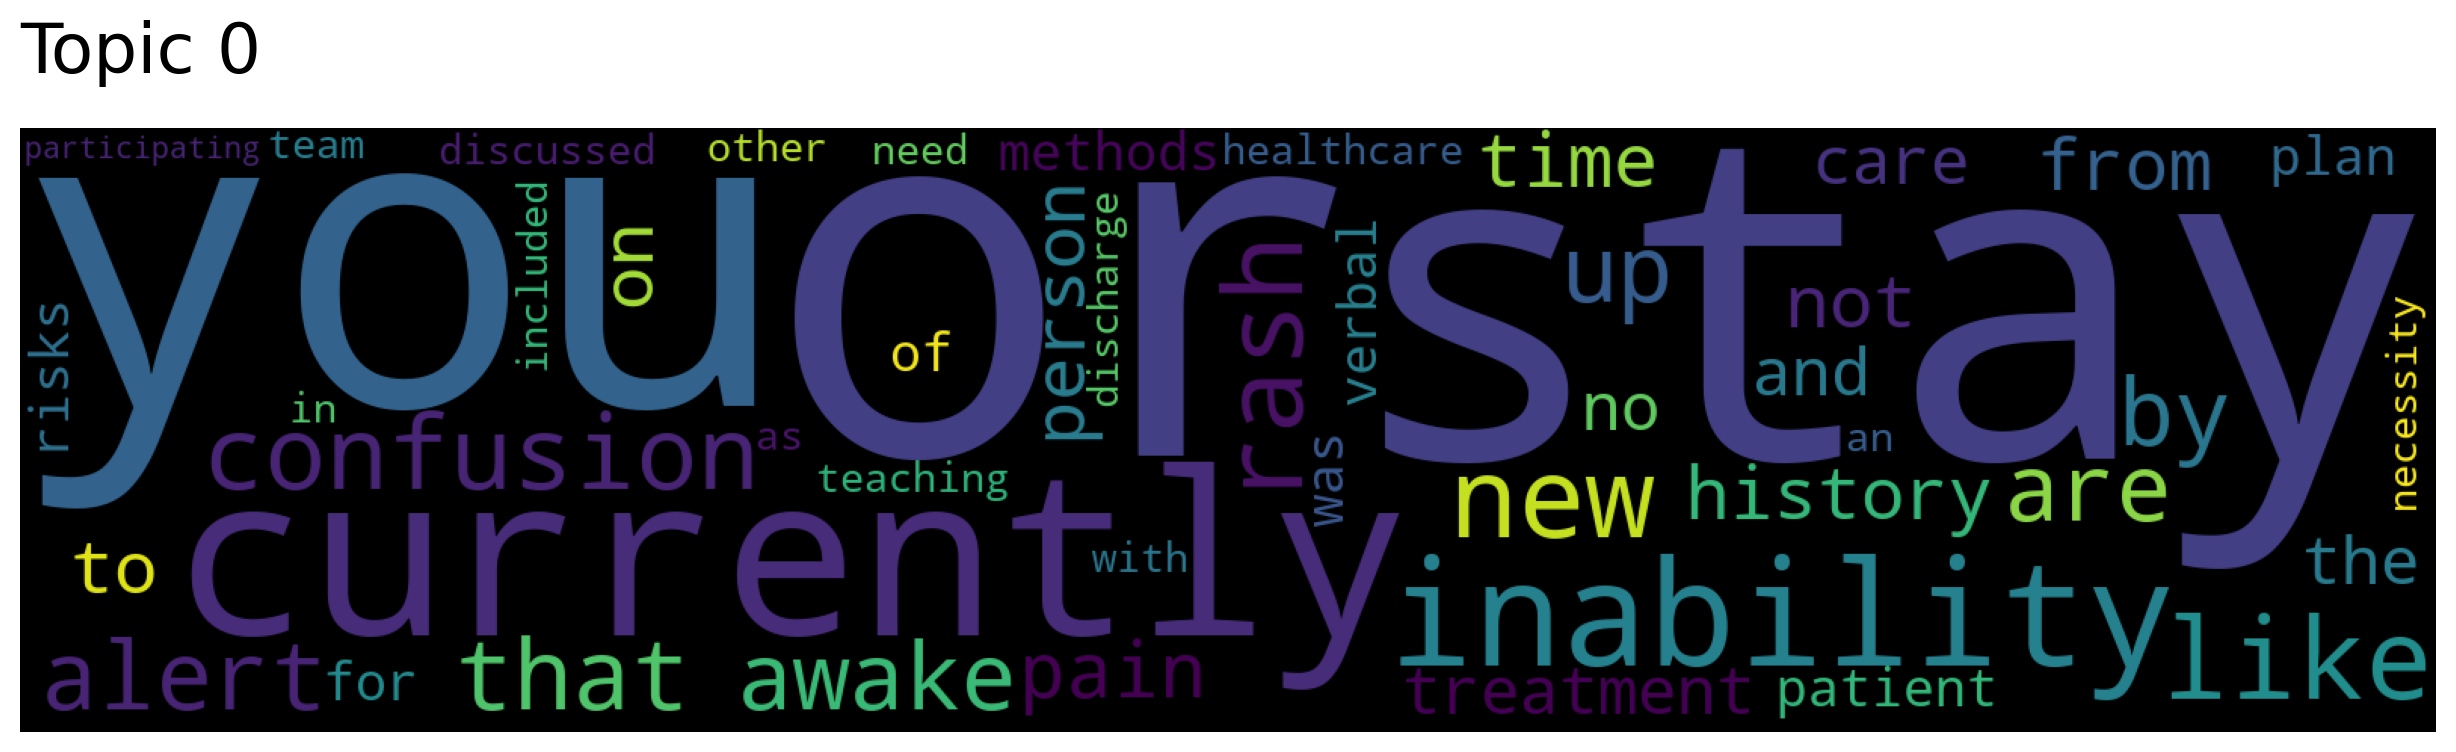

In [78]:
dispTopic(0)

Overall topic related words :  ['learning', 'were', 'barriers', 'identified', 'included', 'used', 'instructions', 'to', 'need', 'illness', 'printed', 'verbalized', 'an', 'interventions', 'teaching', 'discharge', 'no', 'as', 'address', 'methods', 'understanding', 'up', 'necessity', 'is', 'patient', 'other', 'from', 'are', 'procedure', 'time', 'verbal', 'healthcare', 'team', 'participating', 'of', 'by', 'in', 'awake', 'and', 'members', 'diagnosis', 'care', 'risks', 'not', 'for', 'history', 'with', 'alert', 'person', 'was']

Topic Size :  249

Sample document from this topic
(array([' Identified Illness as a learning need, Patients primary language is English, No Barriers to learning were identified, Involved Family Member or Primary Caregiver to address Barriers to Learning, Teaching methods used included Printed Patient Instructions, Verbal Instructions, Patient verbalized an understanding of discharge teaching.',
       ' Identified Follow-up care as a learning need, Patients primary l

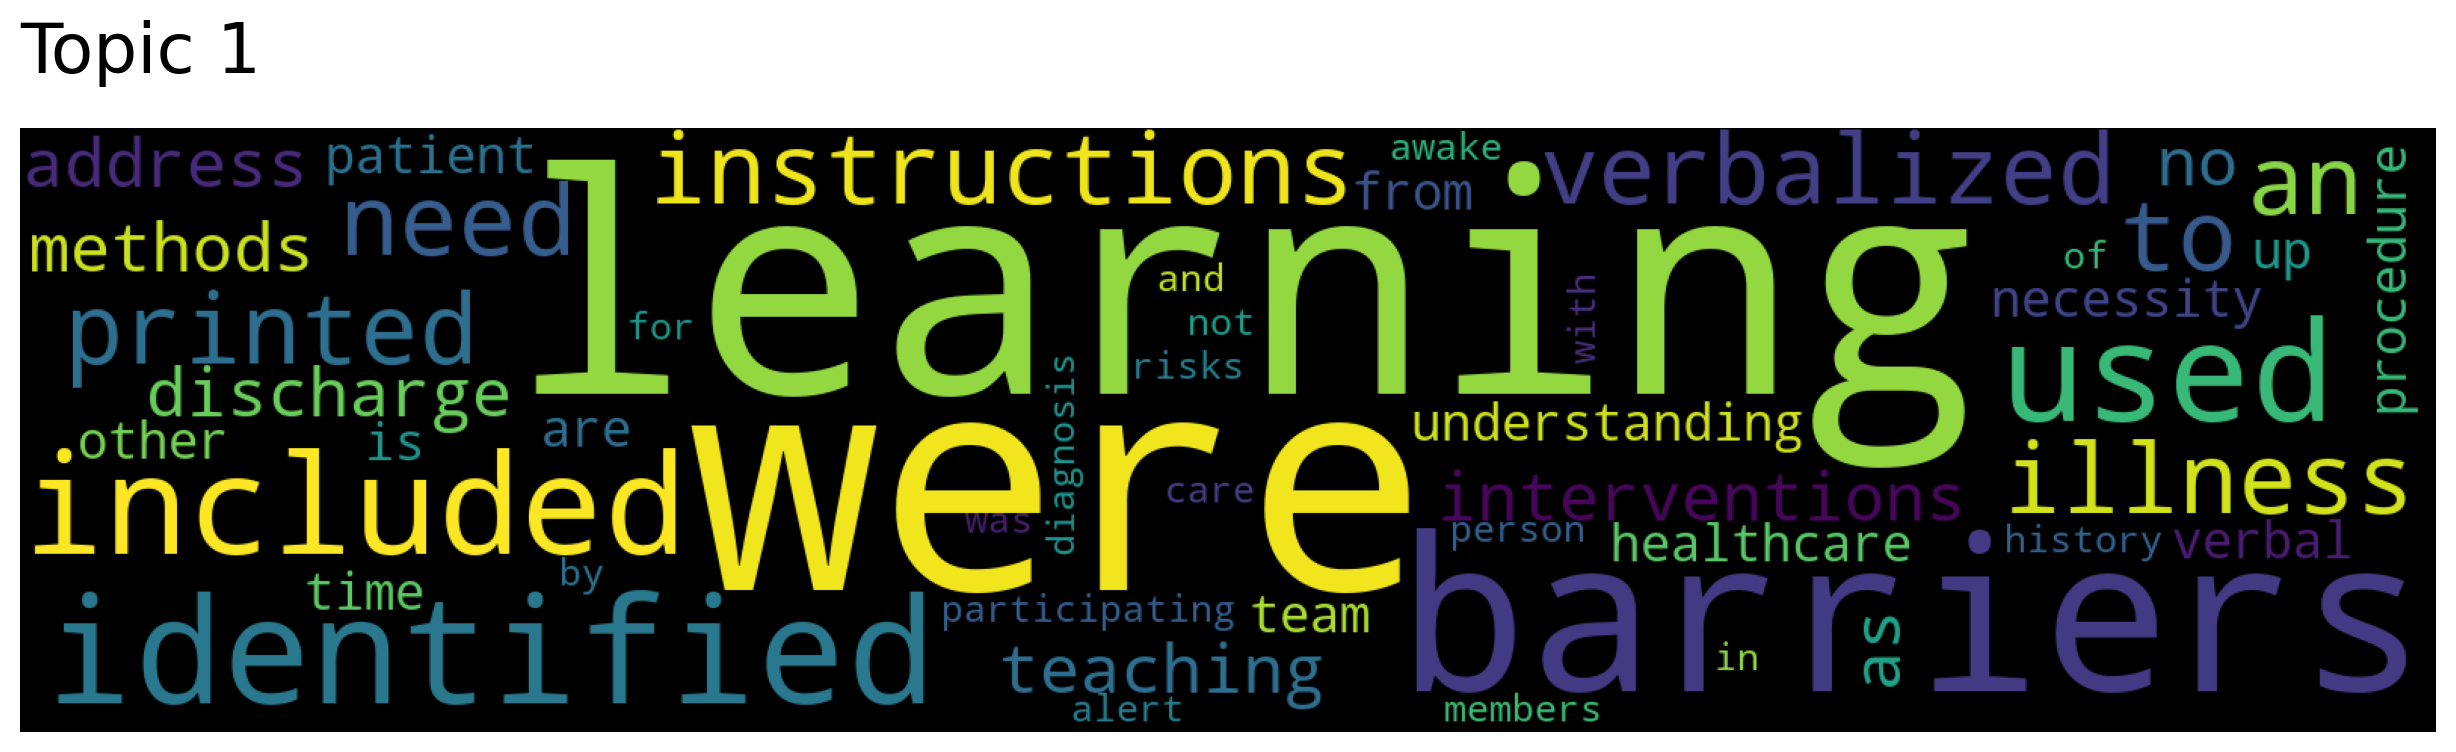

In [79]:
dispTopic(1)

Overall topic related words :  ['identified', 'as', 'barriers', 'learning', 'is', 'included', 'verbal', 'interventions', 'address', 'to', 'need', 'patient', 'no', 'pain', 'used', 'teaching', 'care', 'methods', 'an', 'illness', 'were', 'instructions', 'other', 'diagnosis', 'discharge', 'not', 'verbalized', 'understanding', 'was', 'printed', 'participating', 'plan', 'up', 'inability', 'members', 'risks', 'awake', 'alert', 'stay', 'the', 'treatment', 'procedure', 'team', 'in', 'of', 'rash', 'that', 'and', 'from', 'are']

Topic Size :  231

Sample document from this topic
(array([' Identified Illness as a learning need, No Barriers to learning were identified, No interventions were used to address Barriers to Learning, Teaching methods used included Printed Patient Instructions, Verbal Instructions, Patient demonstrated an understanding of discharge teaching.',
       'Explained diagnosis and treatment plan; patient/child/caregiver expressed understanding of the content..',
       'The pat

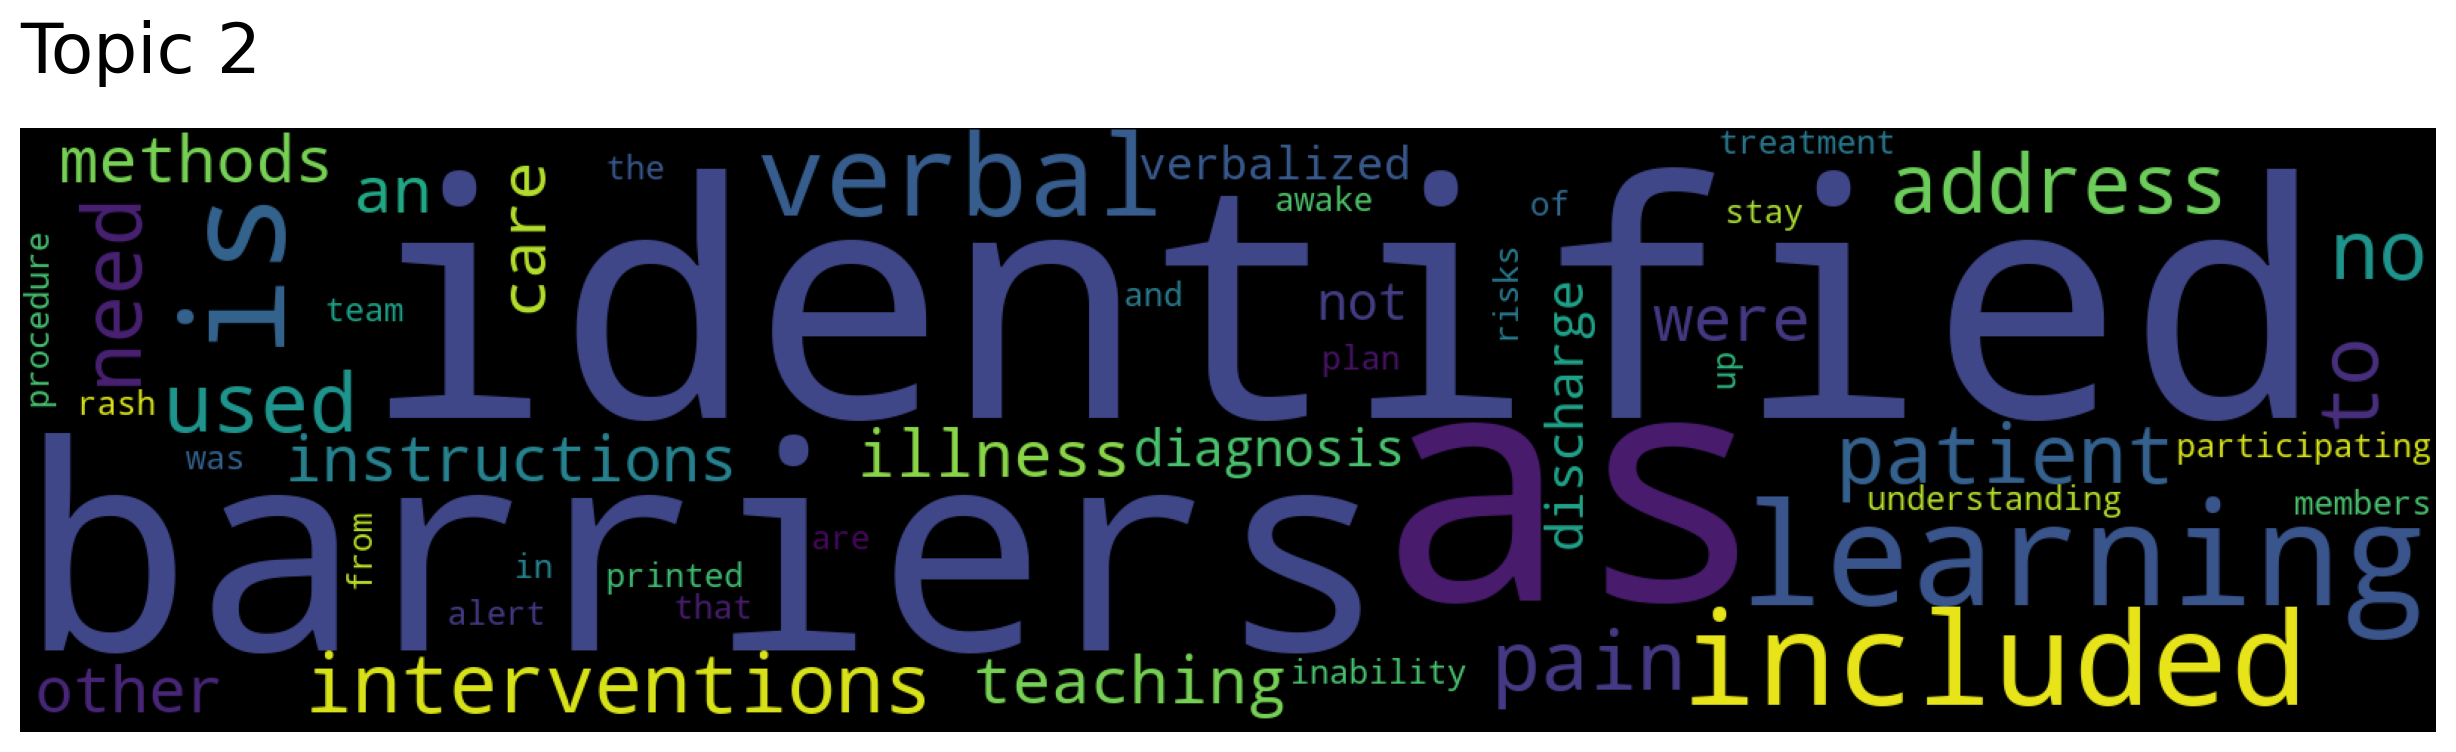

In [80]:
dispTopic(2)

**Comparing with LDA based model's coherence score**

In [91]:
topics_words_lda = rdPickle('pickle/clinicalSTS/topics_words_50.pkl', )

In [92]:
topics_words_lda

[['patient',
  'barrier',
  'understanding',
  'use',
  'learn',
  'identify',
  'learning',
  'teaching',
  'need',
  'discharge',
  'include',
  'verbalize',
  'care',
  'method',
  'address',
  'intervention',
  'instruction',
  'history',
  'time',
  'treatment',
  'plan',
  'diagnosis',
  'obtain',
  'place',
  'cooperative',
  'appear',
  'follow',
  'orient',
  'person',
  'express',
  'alert',
  'arrive',
  'explain',
  'content',
  'review',
  'home',
  'assistance',
  'family',
  'ready',
  'primary',
  'language',
  'apparent',
  'give',
  'comfortable',
  'preference',
  'listen',
  'parent',
  'ambulate',
  'caregiver',
  'demonstrate'],
 ['stay',
  'pain',
  'new',
  'inability',
  'alert',
  'awake',
  'confusion',
  'time',
  'currently',
  'rash',
  'red',
  'fever',
  'neck',
  'feel',
  'go',
  'glass',
  'blotch',
  'press',
  'purple',
  'stand',
  'breathe',
  'sit',
  'chest',
  'collapse',
  'purpural',
  'mouth',
  'painful',
  'sudden',
  'hour',
  'even',
  '

In [93]:
def remFromList(remval,lst):
    lst_out = [[ele for ele in sub if ele != remval] for sub in lst]
    return lst_out 

In [61]:
# remval = 'barrier'
# topics_words_lda = remFromList(remval,topics_words_lda)
# remval= 'method'
# topics_words_lda = remFromList(remval,topics_words_lda)
# remval= 'obtain'
# topics_words_lda = remFromList(remval,topics_words_lda)
# remval= 'appear'
# topics_words_lda = remFromList(remval,topics_words_lda)
# remval= 'orient'
# topics_words_lda = remFromList(remval,topics_words_lda)
# remval='express'
# topics_words_lda = remFromList(remval,topics_words_lda)

In [94]:
# Coherence model
cm_lda = CoherenceModel(topics=topics_words_lda, 
                    texts=texts,
                    coherence='c_v',  
                    dictionary=word2id)

coherence_per_topic_lda = cm_lda.get_coherence_per_topic()


In [97]:
coherence_per_topic_lda

[0.597277702065747, 0.9012939971439293, 0.4944812464315699]

In [98]:
from statistics import mean
mean(coherence_per_topic_lda)

0.6643509818804154

In [99]:
df_Topic = rdPickle('pickle/clinicalSTS/df_Topic.pkl')

In [112]:
df_Topic[df_Topic.Topic==0][:2]

,Text,Cleaned_Text,Topic
1,"Patient arrives ambulatory, Gait steady, Hist...","[patient, arrive, ambulatory, steady, history,...",0
4,Spent 15 minutes with the patient and greater ...,"[spend, minute, patient, great, %, time, spend...",0


In [117]:
def dispTopicLda(ind):
    print("Overall topic related words : ", topics_words_lda[ind])
    print()
    print("Topic Size : ", len(df_Topic[df_Topic.Topic==ind]))
    print()
#     model.generate_topic_wordcloud(ind)
    print("Sample document from this topic")
    print(df_Topic[df_Topic.Topic==ind][:3]['Text'].tolist())


In [118]:
dispTopicLda(0)

Overall topic related words :  ['patient', 'barrier', 'understanding', 'use', 'learn', 'identify', 'learning', 'teaching', 'need', 'discharge', 'include', 'verbalize', 'care', 'method', 'address', 'intervention', 'instruction', 'history', 'time', 'treatment', 'plan', 'diagnosis', 'obtain', 'place', 'cooperative', 'appear', 'follow', 'orient', 'person', 'express', 'alert', 'arrive', 'explain', 'content', 'review', 'home', 'assistance', 'family', 'ready', 'primary', 'language', 'apparent', 'give', 'comfortable', 'preference', 'listen', 'parent', 'ambulate', 'caregiver', 'demonstrate']

Topic Size :  355

Sample document from this topic
[' Patient arrives ambulatory, Gait steady, History obtained from patient, Patient appears comfortable, Patient cooperative, alert, Skin warm.', 'Spent 15 minutes with the patient and greater than 50% of this time was spent counseling the patient regarding diagnosis and available treatment options.', ' Negative gastrointestinal review of systems, Historian

In [110]:
dispTopicLda(1)

Overall topic related words :  ['stay', 'pain', 'new', 'inability', 'alert', 'awake', 'confusion', 'time', 'currently', 'rash', 'red', 'fever', 'neck', 'feel', 'go', 'glass', 'blotch', 'press', 'purple', 'stand', 'breathe', 'sit', 'chest', 'collapse', 'purpural', 'mouth', 'painful', 'sudden', 'hour', 'even', 'symptom', 'resting', 'inactive', 'struggle', 'pressure', 'bleeding', 'day', 'cry', 'blood', 'inhalation', 'other', 'newly', 'tightness', 'vomit', 'jaw', 'cough', 'arm', 'swallow', 'urine', 'present']

Topic Size :  181

Sample document from this topic
['Insulin NPH Human [NOVOLIN N] 100 unit/mL suspension subcutaneous as directed by prescriber.', ' No: new confusion or inability to stay alert and awake; currently struggling to breathe, even while inactive or resting; currently feeling like you are going to collapse every time you stand (sit); vomit that looks like ground coffee; vomiting blood; uncontrollable or continuous rectal bleeding; black, sticky, tar-like stools; heavy vag

In [111]:
dispTopicLda(2)

Overall topic related words :  ['procedure', 'discuss', 'other', 'patient', 'member', 'team', 'participate', 'necessity', 'risk', 'healthcare', 'alternative', 'goal', 'directive', 'benefit', 'plan', 'treatment', 'consent', 'right', 'include', 'assessment', 'advance', 'site', 'use', 'male', 'female', 'establish', 'leave', 'have', 'finding', 'present', 'respiratory', 'correct', 'advanced', 'attempt', 'discussion', 'well', 'activity', 'question', 'care', 'need', 'age', 'representative', 'legal', 'sign', 'catheter', 'day', 'gauge', 'informed', 'surgical', 'special']

Topic Size :  214

Sample document from this topic
[' Peripheral IV site, established in the right forearm, using an 18 gauge catheter, in one attempt.', ' Cardiovascular assessment findings include heart rate normal, Heart rhythm, atrial fibrillation with controlled ventricular response.', ' Discussed the necessity of other members of the healthcare team, both male and female, participating in the procedure.']


In [98]:
# embedding_vector = model.embed(["This is a fake news article."])
# embedding_vector.shape